<a href="https://colab.research.google.com/github/saurabhmungale/DataScience_Assignements/blob/main/CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Que.1.Smplement a basic convolution operation using a filter and a 5x5 image (matrix)


In [1]:
import numpy as np

# Define the 5x5 image matrix
image = np.array([[1, 2, 3, 0, 1],
                  [4, 5, 6, 1, 2],
                  [7, 8, 9, 2, 3],
                  [0, 1, 2, 3, 4],
                  [1, 2, 3, 4, 5]])

# Define the 3x3 filter/kernel
kernel = np.array([[1, 0, 1],
                   [0, 1, 0],
                   [1, 0, 1]])

# Get the dimensions of the image and the kernel
image_height, image_width = image.shape
kernel_height, kernel_width = kernel.shape

# Define the output dimensions (since we have valid padding)
output_height = image_height - kernel_height + 1
output_width = image_width - kernel_width + 1

# Initialize an output matrix of the correct size
output = np.zeros((output_height, output_width))

# Perform the convolution
for i in range(output_height):
    for j in range(output_width):
        # Extract the region of the image corresponding to the filter
        region = image[i:i+kernel_height, j:j+kernel_width]

        # Perform element-wise multiplication and sum
        output[i, j] = np.sum(region * kernel)

# Display the output matrix
print("Convolved Output:")
print(output)


Convolved Output:
[[25. 18. 17.]
 [20. 19. 16.]
 [21. 18. 23.]]


Que.2. Implement max pooling on a 4x4 feature map with a 2x2 window


In [2]:
import numpy as np

# Define the 4x4 feature map
feature_map = np.array([[1, 3, 2, 4],
                        [5, 6, 7, 8],
                        [9, 10, 11, 12],
                        [13, 14, 15, 16]])

# Define the window size and stride
window_size = 2
stride = 2

# Calculate the output size
output_height = (feature_map.shape[0] - window_size) // stride + 1
output_width = (feature_map.shape[1] - window_size) // stride + 1

# Initialize an output matrix
output = np.zeros((output_height, output_width))

# Perform max pooling
for i in range(output_height):
    for j in range(output_width):
        # Extract the region of the feature map corresponding to the pooling window
        region = feature_map[i*stride:i*stride+window_size, j*stride:j*stride+window_size]

        # Find the maximum value in the region
        output[i, j] = np.max(region)

# Display the output matrix
print("Max Pooling Output:")
print(output)


Max Pooling Output:
[[ 6.  8.]
 [14. 16.]]


Que.3.Implement the ReLU activation function on a feature map


In [3]:
import numpy as np

# Define the input feature map (4x4 matrix)
feature_map = np.array([[1, -2, 3, -4],
                        [-5, 6, -7, 8],
                        [9, -10, 11, -12],
                        [13, -14, 15, -16]])

# Apply ReLU activation: ReLU(x) = max(0, x)
relu_output = np.maximum(0, feature_map)

# Display the output feature map after applying ReLU
print("ReLU Activation Output:")
print(relu_output)


ReLU Activation Output:
[[ 1  0  3  0]
 [ 0  6  0  8]
 [ 9  0 11  0]
 [13  0 15  0]]


Que.4.Create a simple CNN model with one convolutional layer and a fully connected layer, using random data


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate random data (e.g., 100 samples of 28x28 grayscale images)
num_samples = 100
input_shape = (28, 28, 1)  # 28x28 images with 1 channel (grayscale)
random_data = np.random.random((num_samples, *input_shape))

# Generate random labels (e.g., for 10 classes)
random_labels = np.random.randint(10, size=(num_samples,))

# Create the CNN model
model = models.Sequential()

# Convolutional layer: 32 filters, kernel size of 3x3, ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# Flatten the 2D output to 1D
model.add(layers.Flatten())

# Fully connected layer (Dense): 10 units for 10 classes
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model with random data (just for illustration)
model.fit(random_data, random_labels, epochs=3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         216,330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,650 (846.29 KB)

 Trainable params: 216,650 (846.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1332 - loss: 2.8308 
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1885 - loss: 2.3452 
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2406 - loss: 2.2745 


Que.5. Generate a synthetic dataset using random noise and train a simple CNN model on it


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset
num_samples = 1000  # Number of samples
image_size = 28  # Image size (28x28 pixels)
num_classes = 10  # Number of classes for classification

# Create random images (e.g., 28x28 grayscale images with random noise)
random_images = np.random.random((num_samples, image_size, image_size, 1))

# Generate random labels (e.g., for 10 classes)
random_labels = np.random.randint(num_classes, size=(num_samples,))

# Split into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * num_samples)
X_train, X_val = random_images[:train_size], random_images[train_size:]
y_train, y_val = random_labels[:train_size], random_labels[train_size:]

# Define the CNN model
model = models.Sequential()

# Add a convolutional layer with 32 filters, kernel size 3x3, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))

# Add a max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into the fully connected layer
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Add a softmax output layer with 10 classes
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc:.4f}")


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1262 - loss: 2.3358 - val_accuracy: 0.0950 - val_loss: 2.3185
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1037 - loss: 2.3114 - val_accuracy: 0.1650 - val_loss: 2.3016
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1708 - loss: 2.2842 - val_accuracy: 0.1000 - val_loss: 2.3042
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1660 - loss: 2.2539 - val_accuracy: 0.1000 - val_loss: 2.2974
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1695 - loss: 2.2224 - val_accuracy: 0.1400 - val_loss: 2.2979
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1371 - loss: 2.3057
Validation accuracy: 0.1400


Que.6. Create a simple CNN using Keras with one convolution layer and a max-pooling layer


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset
num_samples = 1000  # Number of samples
image_size = 28  # Image size (28x28 pixels)
num_classes = 10  # Number of classes for classification

# Create random images (e.g., 28x28 grayscale images with random noise)
random_images = np.random.random((num_samples, image_size, image_size, 1))

# Generate random labels (e.g., for 10 classes)
random_labels = np.random.randint(num_classes, size=(num_samples,))

# Split into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * num_samples)
X_train, X_val = random_images[:train_size], random_images[train_size:]
y_train, y_val = random_labels[:train_size], random_labels[train_size:]

# Create the CNN model
model = models.Sequential()

# Add a convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))

# Add a max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layer to feed into the fully connected layer
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Add an output layer with 10 units for classification (softmax activation for multi-class)
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc:.4f}")


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0956 - loss: 2.4391 - val_accuracy: 0.1700 - val_loss: 2.2871
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1060 - loss: 2.3086 - val_accuracy: 0.0950 - val_loss: 2.3055
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1712 - loss: 2.2772 - val_accuracy: 0.0750 - val_loss: 2.3191
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2358 - loss: 2.2528 - val_accuracy: 0.0750 - val_loss: 2.3184
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1797 - loss: 2.1978 - val_accuracy: 0.1650 - val_loss: 2.2824
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1696 - loss: 2.2721 
Validation accuracy: 0.1650


Que.7. Write a code to add a fully connected layer after the convolution and max-pooling layers in a CNN


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset
num_samples = 1000  # Number of samples
image_size = 28  # Image size (28x28 pixels)
num_classes = 10  # Number of classes for classification

# Create random images (e.g., 28x28 grayscale images with random noise)
random_images = np.random.random((num_samples, image_size, image_size, 1))

# Generate random labels (e.g., for 10 classes)
random_labels = np.random.randint(num_classes, size=(num_samples,))

# Split into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * num_samples)
X_train, X_val = random_images[:train_size], random_images[train_size:]
y_train, y_val = random_labels[:train_size], random_labels[train_size:]

# Create the CNN model
model = models.Sequential()

# Add a convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))

# Add a max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional and pooling layers to feed into the fully connected layer
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Add an output layer with 10 units for classification (softmax activation for multi-class)
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc:.4f}")


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.0979 - loss: 2.3481 - val_accuracy: 0.1000 - val_loss: 2.3191
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1733 - loss: 2.2832 - val_accuracy: 0.0950 - val_loss: 2.3056
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2285 - loss: 2.2141 - val_accuracy: 0.1150 - val_loss: 2.3230
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4299 - loss: 2.1074 - val_accuracy: 0.1300 - val_loss: 2.3041
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5014 - loss: 1.9781 - val_accuracy: 0.1000 - val_loss: 2.3720
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0848 - loss: 2.3909 
Validation accuracy: 0.1000


Que.8.  Write a code to add  batch normalization to a simple CNN model


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset
num_samples = 1000  # Number of samples
image_size = 28  # Image size (28x28 pixels)
num_classes = 10  # Number of classes for classification

# Create random images (e.g., 28x28 grayscale images with random noise)
random_images = np.random.random((num_samples, image_size, image_size, 1))

# Generate random labels (e.g., for 10 classes)
random_labels = np.random.randint(num_classes, size=(num_samples,))

# Split into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * num_samples)
X_train, X_val = random_images[:train_size], random_images[train_size:]
y_train, y_val = random_labels[:train_size], random_labels[train_size:]

# Create the CNN model
model = models.Sequential()

# Add a convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))

# Add Batch Normalization after the convolutional layer
model.add(layers.BatchNormalization())

# Add a max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional and pooling layers to feed into the fully connected layer
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Add Batch Normalization after the dense layer
model.add(layers.BatchNormalization())

# Add an output layer with 10 units for classification (softmax activation for multi-class)
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc:.4f}")


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.1282 - loss: 2.9283 - val_accuracy: 0.1050 - val_loss: 2.3297
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9158 - loss: 0.5826 - val_accuracy: 0.1100 - val_loss: 2.6543
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 0.1713 - val_accuracy: 0.1150 - val_loss: 3.0588
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 0.0855 - val_accuracy: 0.1250 - val_loss: 3.3789
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 0.0524 - val_accuracy: 0.1500 - val_loss: 3.5988
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1400 - loss: 3.6476 
Validation accuracy: 0.1500


Que.9.Write a code to add dropout regularization to a simple CNN mode|


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset
num_samples = 1000  # Number of samples
image_size = 28  # Image size (28x28 pixels)
num_classes = 10  # Number of classes for classification

# Create random images (e.g., 28x28 grayscale images with random noise)
random_images = np.random.random((num_samples, image_size, image_size, 1))

# Generate random labels (e.g., for 10 classes)
random_labels = np.random.randint(num_classes, size=(num_samples,))

# Split into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * num_samples)
X_train, X_val = random_images[:train_size], random_images[train_size:]
y_train, y_val = random_labels[:train_size], random_labels[train_size:]

# Create the CNN model
model = models.Sequential()

# Add a convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))

# Add a max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Add Dropout regularization after the pooling layer (drop 30% of the neurons)
model.add(layers.Dropout(0.3))

# Flatten the output of the convolutional and pooling layers to feed into the fully connected layer
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Add Dropout regularization after the dense layer (drop 50% of the neurons)
model.add(layers.Dropout(0.5))

# Add an output layer with 10 units for classification (softmax activation for multi-class)
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc:.4f}")


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1276 - loss: 2.3973 - val_accuracy: 0.0650 - val_loss: 2.3121
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1021 - loss: 2.3083 - val_accuracy: 0.1200 - val_loss: 2.2989
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1254 - loss: 2.2894 - val_accuracy: 0.0950 - val_loss: 2.3006
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1556 - loss: 2.2738 - val_accuracy: 0.0850 - val_loss: 2.3049
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1954 - loss: 2.2315 - val_accuracy: 0.1100 - val_loss: 2.3033
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1367 - loss: 2.2888 
Validation accuracy: 0.1100


Que.10.Write a code to print the architecture of the VGG16 model in Keras*


In [10]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

# Load the VGG16 model without the top classification layer
# include_top=False means not including the fully connected layers at the top
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Print the model summary (architecture)
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

QUE.11.write a code to plot the accuracy and loss graphs after training a CNN model


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.0947 - loss: 2.3797 - val_accuracy: 0.0650 - val_loss: 2.3311
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1390 - loss: 2.2897 - val_accuracy: 0.1150 - val_loss: 2.3122
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1943 - loss: 2.2496 - val_accuracy: 0.0950 - val_loss: 2.3275
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2572 - loss: 2.1931 - val_accuracy: 0.0950 - val_loss: 2.3474
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3144 - loss: 2.1026 - val_accuracy: 0.1150 - val_loss: 2.3252


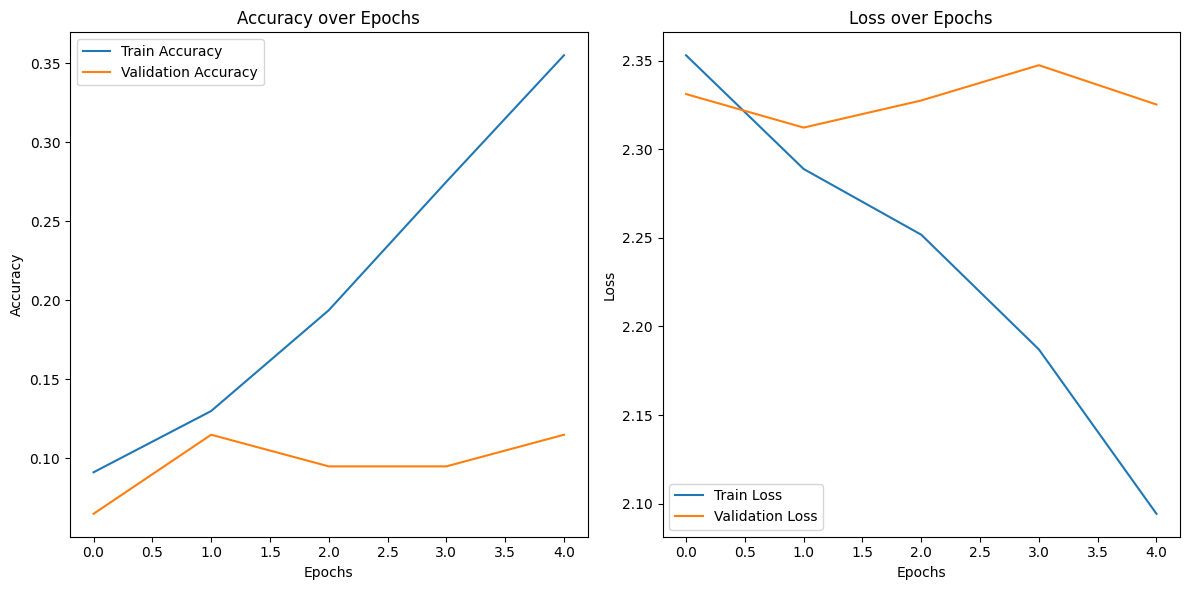

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset
num_samples = 1000  # Number of samples
image_size = 28  # Image size (28x28 pixels)
num_classes = 10  # Number of classes for classification

# Create random images (e.g., 28x28 grayscale images with random noise)
random_images = np.random.random((num_samples, image_size, image_size, 1))

# Generate random labels (e.g., for 10 classes)
random_labels = np.random.randint(num_classes, size=(num_samples,))

# Split into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * num_samples)
X_train, X_val = random_images[:train_size], random_images[train_size:]
y_train, y_val = random_labels[:train_size], random_labels[train_size:]

# Create the CNN model
model = models.Sequential()

# Add a convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))

# Add a max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional and pooling layers to feed into the fully connected layer
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Add an output layer with 10 units for classification (softmax activation for multi-class)
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


Que,12,5 Write a code to print the architecture of the ResNet50 model in Keras*


In [12]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model with pre-trained ImageNet weights
# include_top=False means not including the fully connected layers at the top
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Print the model summary (architecture)
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

QUe.13. 5 Write a code to train a basic CNN model and print the training loss and accuracy after each epoch?


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset
num_samples = 1000  # Number of samples
image_size = 28  # Image size (28x28 pixels)
num_classes = 10  # Number of classes for classification

# Create random images (e.g., 28x28 grayscale images with random noise)
random_images = np.random.random((num_samples, image_size, image_size, 1))

# Generate random labels (e.g., for 10 classes)
random_labels = np.random.randint(num_classes, size=(num_samples,))

# Split into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * num_samples)
X_train, X_val = random_images[:train_size], random_images[train_size:]
y_train, y_val = random_labels[:train_size], random_labels[train_size:]

# Create the CNN model
model = models.Sequential()

# Add a convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))

# Add a max pooling layer with a pool size of 2x2
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional and pooling layers to feed into the fully connected layer
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Add an output layer with 10 units for classification (softmax activation for multi-class)
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Custom Callback to print training loss and accuracy after each epoch
class PrintMetrics(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}")

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[PrintMetrics()])

# Optionally, you can evaluate the model after training
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")


Epoch 1/5
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1160 - loss: 2.3602Epoch 1: Loss = 2.3381, Accuracy = 0.1163
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.1162 - loss: 2.3569 - val_accuracy: 0.0700 - val_loss: 2.3282
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1156 - loss: 2.3026Epoch 2: Loss = 2.2970, Accuracy = 0.1338
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1163 - loss: 2.3024 - val_accuracy: 0.0650 - val_loss: 2.3141
Epoch 3/5
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1868 - loss: 2.2650Epoch 3: Loss = 2.2610, Accuracy = 0.1850
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1866 - loss: 2.2647 - val_accuracy: 0.0750 - val_loss: 2.3254
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2643 - loss: 2.2034Epoch 4: Loss = 2.2025, Accuracy = 0.2400
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2633 - loss: 2.2034 - val_accuracy: 0.0850 - val_loss: 2.3469
Epoch 5/5
24/25 ━━━━━━━━━━━━━━━━━━━━